In [1]:
%matplotlib inline
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

import sys
sys.path.insert(0, '/Users/bmmorris/git/gravdark/')

from gravdark import LightCurve, hat7_params
from gravdark.lightcurve import concatenate_light_curves

h7_path = glob('/Users/bmmorris/data/gravdark/hat7/*slc.fits')
h7_lc_whole = LightCurve.from_raw_fits(h7_path, name='HAT-P-7 b')

h7_masked = LightCurve(**h7_lc_whole.mask_out_of_transit(hat7_params(), oot_duration_fraction=0.5))
h7_transits = h7_masked.get_transit_light_curves(hat7_params())
for transit in h7_transits:
    transit.remove_linear_baseline(hat7_params())
h7 = concatenate_light_curves(h7_transits)

In [13]:
params = hat7_params()

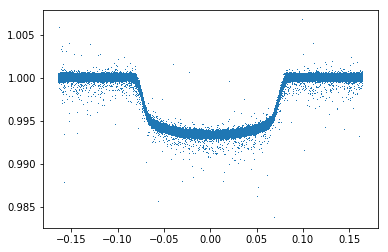

In [6]:
times, all_fluxes = h7.phases(hat7_params()) * hat7_params().per, h7.fluxes

all_fluxes = all_fluxes[np.argsort(times)]
times = times[np.argsort(times)]

plt.plot(times, all_fluxes, ',', rasterized=True)

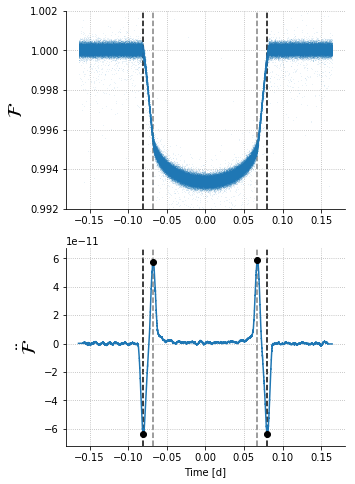

In [24]:
from scipy.signal import savgol_filter

filtered = savgol_filter(all_fluxes, 10001, 2, deriv=2)

fig, ax = plt.subplots(2, 1, figsize=(5, 8))
# ax[0].plot(times, spotless_lc, label='Spotless')
# ax[0].plot(times, spotted_lc, label='Spotted')
ax[0].plot(times, all_fluxes, ',', rasterized=True, alpha=0.1)
from scipy.signal import savgol_filter

n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]

ax[1].plot(times, filtered)

t14 = -1*np.diff(times[mins])[0]
t23 = -1*np.diff(times[maxes])[0]

ax[1].scatter(times[mins], filtered[mins], color='k', zorder=10)
ax[1].scatter(times[maxes], filtered[maxes], color='k', zorder=10)

for ts, c in zip([times[mins], times[maxes]], ['k', 'gray']):
    for t in ts:
        ax[0].axvline(t, ls='--', color=c, zorder=-10)
        ax[1].axvline(t, ls='--', color=c, zorder=-10)

for axis in fig.axes:
    axis.grid(ls=':')
    for s in ['right', 'top']:
        axis.spines[s].set_visible(False)
    axis.legend()
        
ax[0].set_ylabel('$\mathcal{F}$', fontsize=20)
ax[0].set_ylim([0.992, 1.002])
ax[1].set_ylabel('$\ddot{\mathcal{F}}$', fontsize=20)
ax[1].set_xlabel('Time [d]')
fig.savefig('hat7.pdf', bbox_inches='tight')
plt.show()

25401 27871.0925663
25451 28114.9022828
25501 28221.447202
25551 28273.8118685
25601 28274.4243056
25651 28310.0315395
25701 28408.9477822
25751 28499.3501997
25801 28562.0222189
25851 28685.7187547
25901 28676.7166555
25951 28794.5026673


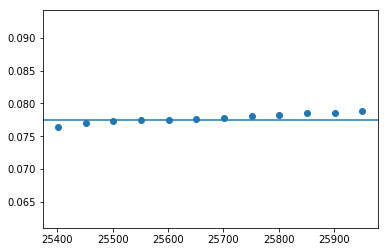

In [39]:

ws = []
ks = []

for w in np.arange(25401, 26001, 50):
    filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
    n = len(times)//2
    mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
    maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
    t14 = abs(np.diff(times[mins])[0])
    t23 = abs(np.diff(times[maxes])[0])
    one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
    one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
    k = (one_plus_k - one_minus_k)/2
    print(w, (t14 - t23) * len(times) / times.ptp())


    ws.append(w)
    ks.append(k)

ws = np.array(ws)
ks = np.array(ks)

plt.scatter(ws, ks)

wmid = 55
# k = np.median(ks[(ws < 70) & (ws > 40)])
# kerr = np.ptp(ks[(ws < 70) & (ws > 40)])/2
# plt.errorbar(wmid, k, yerr=kerr, xerr=15, fmt='s', color='k')

# print(k, kerr)
plt.axhline(params.rp)
# plt.ylim([0, 0.25])

In [36]:

w = 25601
filtered = savgol_filter(all_fluxes, w, 2, deriv=2)
n = len(times)//2
mins = [np.argmin(filtered[:n]), n + np.argmin(filtered[n:])]
maxes = [np.argmax(filtered[:n]), n + np.argmax(filtered[n:])]
t14 = abs(np.diff(times[mins])[0])
t23 = abs(np.diff(times[maxes])[0])
one_plus_k = np.sqrt((np.sin(t14*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
one_minus_k = np.sqrt((np.sin(t23*np.pi/params.per) * np.sin(np.radians(params.inc)) * params.a)**2 + params.b**2)
k = (one_plus_k - one_minus_k)/2

abs(k - params.rp)

8.2732657174705571e-05

In [37]:
(t14 - t23) * len(times) / times.ptp()

28274.424305603392